# Dimensionality Reduction: t-SNE

在MNist Digits的範例中可以發現，PCA雖然可以盡量保留資料整體的variance，但各筆樣本之間的距離關係在低維度有可能被破壞。這是因為PCA是線性轉換，使得資料的各特徵的非線性結構在低維度空間無法被呈現，原本是相遠的點，在降維之後有可能被拉近。t-SNE 主要是將高維空間中的資料點，其點與點之間的相似度用機率分布近似，而低維數據的部分使用另一種機率分布的方式來近似，再使用 KL divergence計算兩種機率分布的距離，最後再以梯度下降（或隨機梯度下降）求最佳解。其精神在於，如果兩個點在高維度是相遠的，其在低維度也要是相遠的，反之亦然。在此我們用之前PCA的Digits範例來了解scikit-learn中如何用t-SNE來做降維。



### 首先import所有需要套件

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
%matplotlib inline

### 載入digits資料集

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

### 如之前的範例，使用PCA將資料降維，維度為2

In [ ]:
pca = PCA(2)  # project from 64 to 2 dimensions
Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)

(1797, 64)
(1797, 2)


### 將資料畫出來

<ipython-input-4-42cef62b443f>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


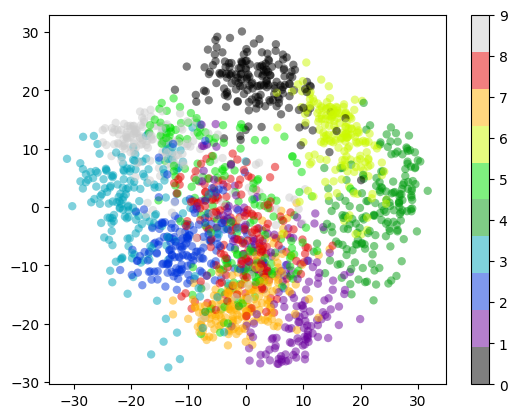

In [ ]:
plt.scatter(Xproj[:, 0],
            Xproj[:, 1],
            c=y,
            edgecolor='none',
            alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()

### 如上圖所示，可以看得出來有很多群並沒有被區分開來，資料點是交錯的，雖然原本相近的點仍相近，但原本高維空間中相遠的點，在降維之後變得混在一起。

### 接下來使用t-SNE做降維，sklearn t-SNE中較重要的參數:
- n_components: 降維之後的維度
- perpexity: 最佳化過程中考慮鄰近點的多寡，default 30，原始paper建議5-50
- n_iter: 迭代次數，預設1000

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

<ipython-input-6-f4642f449d1a>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


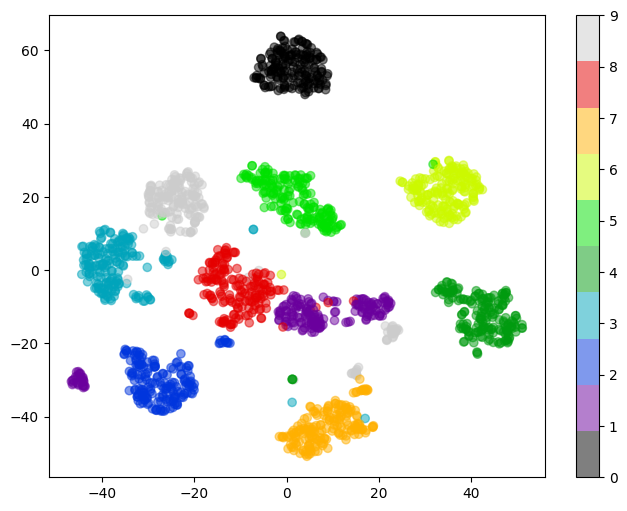

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0],
            X_reduced[:, 1],
            c=y,
            alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()
plt.show()

### 如圖，各cluster距離被明顯拉開。跟PCA不同，t-SNE能讓高維空間中相遠的點，轉換到低維空間後仍是相遠的。

### 在各參數之中，perplexity的建議範圍 5-50，樣本越多，perplexity應設置愈高。
### t-SNE的一個缺點是其計算量很大，如果資料量較多或維度較多，建議先用PCA降維之後再使用t-SNE